In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import os
import trimesh
import nrrd

In [6]:
# Load data
current_dir = os.getcwd()
mesh = trimesh.load_mesh(f'{current_dir}/data/01744_02256_03024/1744_2256_3024_zyx_mesh_1.obj')
mask, header = nrrd.read(f'{current_dir}/data/01744_02256_03024/01744_02256_03024_mask.nrrd')

# Convert trimesh to PyVista mesh
vertices = mesh.vertices
faces = mesh.faces
pv_mesh = pv.PolyData(vertices, np.column_stack((np.full(len(faces), 3), faces)))

/Users/jamesdarby/anaconda3/envs/3D_mesh_fitting/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


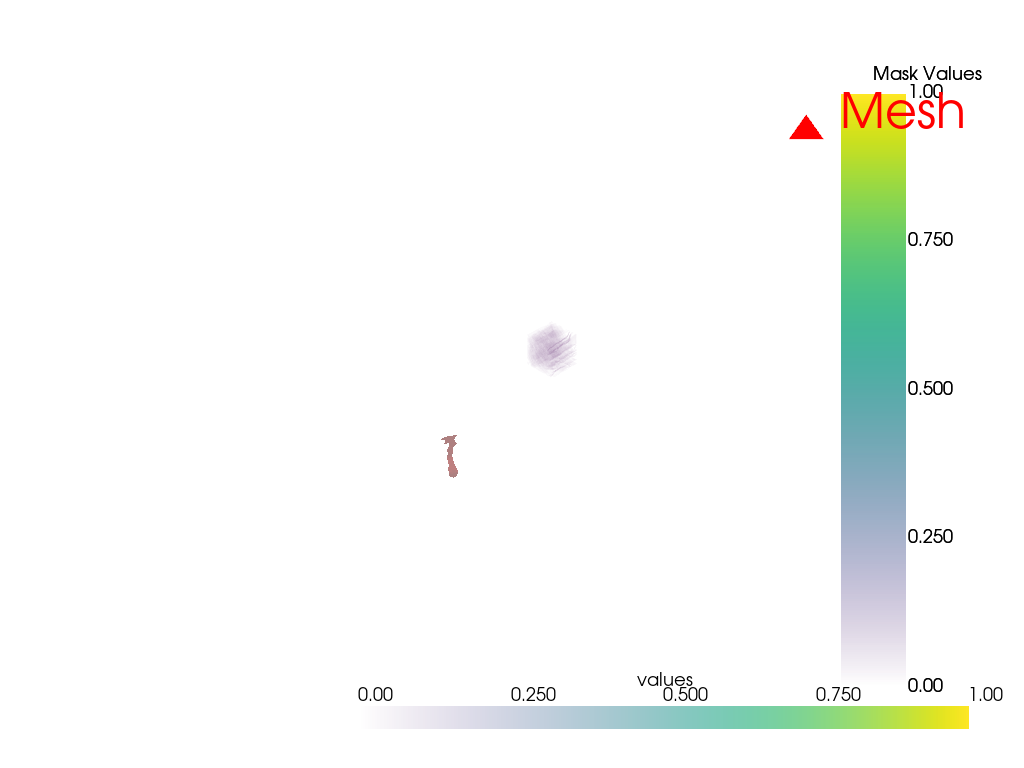

In [8]:
# Create PyVista ImageData from mask
grid = pv.ImageData()

# Set the grid dimensions: shape + 1 because we want to inject our values on the CELL data
grid.dimensions = np.array(mask.shape) + 1

# Set the grid origin and spacing
# Adjust these values if your data has a different origin or voxel size
grid.origin = (0, 0, 0)
grid.spacing = (1, 1, 1)

# Add the mask data to the cell data
grid.cell_data["values"] = mask.flatten(order="F")

# Create plotter
plotter = pv.Plotter()

# Add mesh to plotter
plotter.add_mesh(pv_mesh, color='red', opacity=0.5, label='Mesh')

# Add volume to plotter
plotter.add_volume(grid, cmap='viridis', opacity='linear', clim=[mask.min(), mask.max()])

# Add a colorbar for the volume
plotter.add_scalar_bar("Mask Values", interactive=True)

# Add a legend
plotter.add_legend()

# Show the plotter
plotter.show()